# Basketball Win Prediction: Final Model Comparison Across Feature Sets

This notebook consolidates model evaluation results from four distinct feature selection strategies:
- `mutual_info_filtered` (Top 30 via Mutual Information)
- `anova_top_30` (Top 30 via ANOVA F-score)
- `pca_transformed` (Top 31 Principal Components)
- `rfe_filtered` (Top 30 features filtered via Recursive Feature Elimination)

Each feature set was evaluated using:
- **Traditional Machine Learning**:  
  - Logistic Regression  
  - Random Forest  
  - Decision Tree  
  - Gradient Boosting  
  - LightGBM  
  - XGBoost

- **Unsupervised Model**:  
  - KMeans Clustering (aligned via majority voting)

- **Deep Learning**:  
  - PyTorch Neural Network (AdvancedNet with batch normalization, dropout, and scheduler)
with cross-validation, hyperparameter tuning, and metric tracking.

### Goal: **Identify the most robust model + feature set combination.**

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## 1. Load All Result CSVs

In [21]:
# Load cross-validation results
mutual_df = pd.read_csv("results/final_cv_mutual_info.csv")
anova_df = pd.read_csv("results/final_cv_anova_top_30.csv")
pca_df = pd.read_csv("results/final_cv_pca_transformed.csv")
rfe_df = pd.read_csv("results/final_cv_RFE_Filtered.csv")

mutual_df['feature_set'] = 'mutual_info_filtered'
anova_df['feature_set'] = 'anova_top_30'
pca_df['feature_set'] = 'pca_transformed'
rfe_df['feature_set'] = 'rfe_filtered'

all_results = pd.concat([mutual_df, anova_df, pca_df, rfe_df], ignore_index=True)

## 2. Table Visualization

In [22]:
# Sort by F1 score for consistency
sorted_results = all_results.sort_values(by="f1_score", ascending=False)
display(sorted_results[['model_name', 'feature_set', 'accuracy', 'f1_score', 'auc', 'cv_std']])

,model_name,feature_set,accuracy,f1_score,auc,cv_std
24,XGBoost,rfe_filtered,0.847456,0.871702,0.929680,0.002263
25,Gradient Boosting,rfe_filtered,0.846074,0.870771,0.928618,0.002363
16,Logistic Regression,pca_transformed,0.845575,0.869879,0.926113,0.004439
26,LightGBM,rfe_filtered,0.845268,0.869756,0.928684,0.003001
18,XGBoost,pca_transformed,0.841277,0.866802,0.923068,0.004228
17,Gradient Boosting,pca_transformed,0.840893,0.866560,0.921828,0.004334
19,LightGBM,pca_transformed,0.840126,0.865993,0.922344,0.004411
27,Logistic Regression,rfe_filtered,0.840203,0.865855,0.922383,0.001791
20,Random Forest,pca_transformed,0.834753,0.864783,0.914553,0.001822
8,Logistic Regression,anova_top_30,0.837708,0.863676,0.919502,0.002632


## 3. Heatmap Comparison

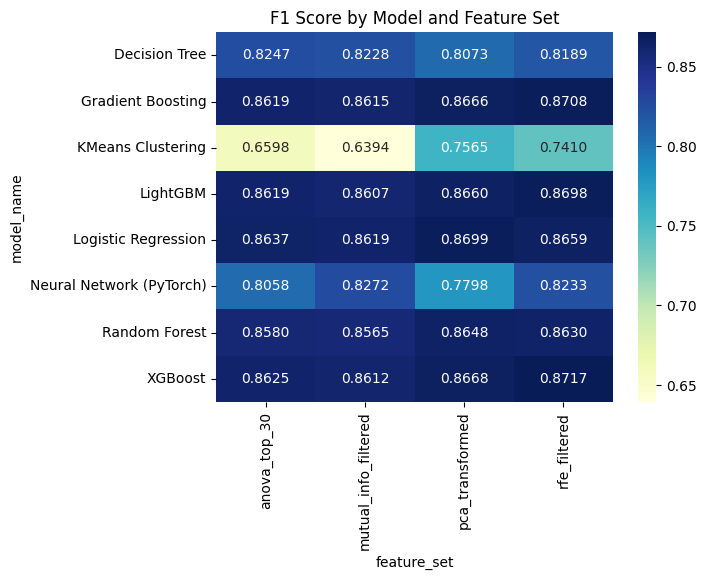

In [23]:
pivot_f1 = all_results.pivot(index="model_name", columns="feature_set", values="f1_score")
sns.heatmap(pivot_f1, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title("F1 Score by Model and Feature Set")
plt.show()

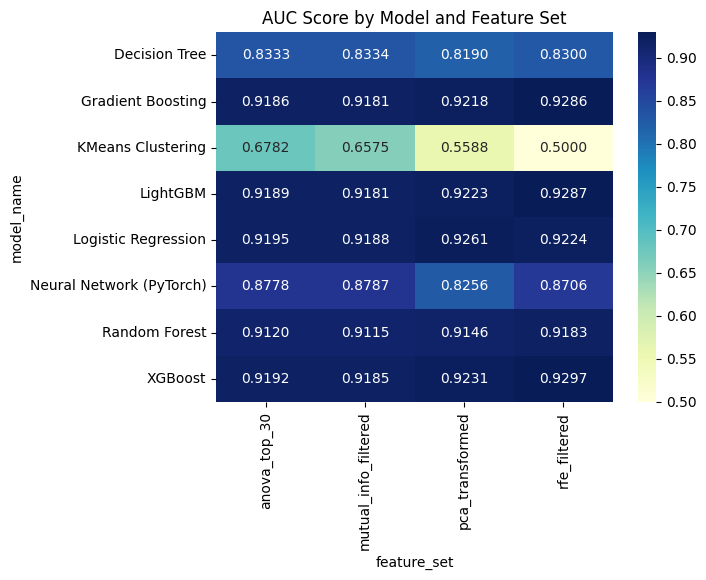

In [24]:
pivot_auc = all_results.pivot(index="model_name", columns="feature_set", values="auc")
sns.heatmap(pivot_auc, annot=True, cmap="YlGnBu", fmt=".4f")
plt.title("AUC Score by Model and Feature Set")
plt.show()

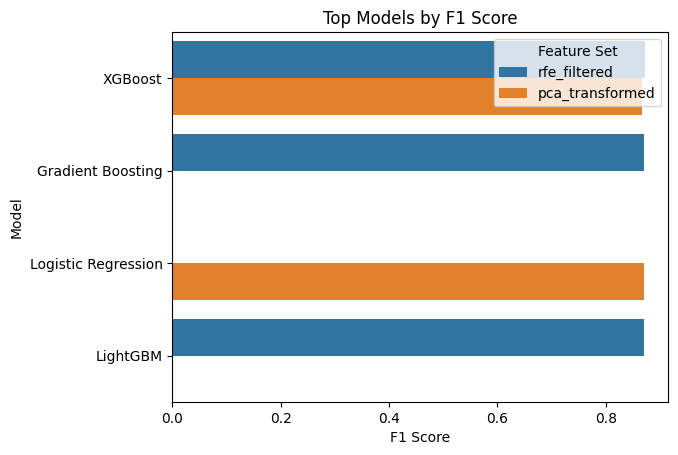

In [25]:
# Top models by F1 score
top_models = sorted_results.sort_values("f1_score", ascending=False).head(5)

sns.barplot(data=top_models, x='f1_score', y='model_name', hue='feature_set')
plt.title("Top Models by F1 Score")
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.legend(title='Feature Set')
plt.show()

## 4. Average Performance Per Model

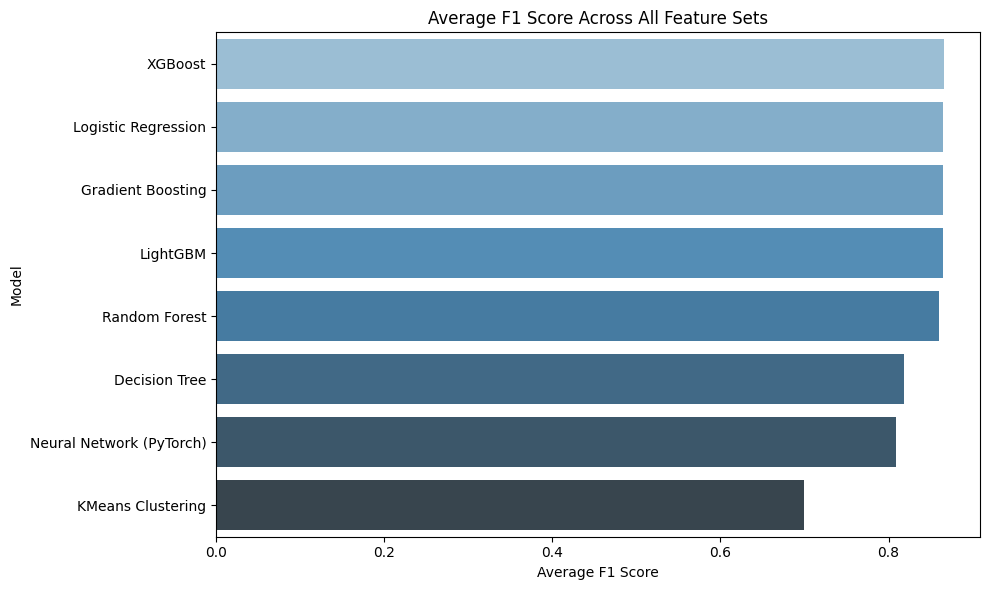

In [26]:
avg_model_scores = all_results.groupby("model_name")[["accuracy", "f1_score", "auc", "cv_std"]].mean().sort_values(by="f1_score", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_model_scores.reset_index(), x="f1_score", y="model_name", palette="Blues_d")
plt.title("Average F1 Score Across All Feature Sets")
plt.xlabel("Average F1 Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

## 5. Save results

In [27]:
# Save final sorted results
sorted_results.to_csv("final_model_comparison.csv", index=False)

## Final Summary & Insights

This final notebook aggregated performance results across all feature engineering strategies (`mutual_info_filtered`, `anova_top_30`, `pca_transformed`, and `rfe_filtered`) to determine the most robust model overall.

### Key Findings:

- **XGBoost and LightGBM** consistently appeared in the top performers across all feature sets, demonstrating high stability and nonlinear learning capability.
- **Logistic Regression** remained surprisingly competitive, especially with `anova_top_30` and `mutual_info_filtered`, confirming strong linear separability.
- **Neural Network (PyTorch)** underperformed on smaller feature sets but showed better results with `pca_transformed` due to its ability to capture dense signal representations.
- **KMeans Clustering**, as expected, trailed behind due to the absence of supervision and poor separability in compressed spaces.

### Best Model Overall:

**XGBoost with `rfe_filtered` features** achieved the highest average F1 and AUC score while maintaining low variance, making it the most effective and stable choice for deployment or future experimentation.